In [119]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import sys
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)

In [112]:
data_325 = pd.read_excel("3-数据清洗后325样本数据.xlsx", na_values=np.nan)

In [113]:
data_325.shape

(268, 203)

In [114]:
data_325

,样本编号,时间,RON损失,原料性质：硫含量,原料性质：辛烷值,原料性质：饱和烃,原料性质：烯烃,原料性质：芳烃,原料性质：溴值,原料性质：密度,...,S-ZORB.AT-0011.DACA.PV,S-ZORB.FT_1204.DACA.PV,S-ZORB.LC_5102.PIDA.PV,S-ZORB.TE_1102.DACA.PV,S-ZORB.CAL.LINE.PV,S-ZORB.CAL.CANGLIANG.PV,S-ZORB.CAL.SPEED.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
0,1,2020/5/26 8:00:00,1.38,188.000000,90.6,53.230000,24.400000,22.370000,61.487143,726.085714,...,0.496243,18.292067,42.015425,425.929515,0.282564,37.804650,3.324945,3.906312e+07,3.960876e+07,0.353271
1,2,2020/5/21 8:00:00,1.18,169.000000,90.5,52.300000,26.400000,21.300000,61.880000,731.300000,...,0.491385,19.842605,40.903878,421.534365,0.281381,37.876006,3.321169,3.881058e+07,3.938930e+07,0.354504
2,3,2020/5/19 8:00:00,1.38,177.000000,90.7,52.300000,26.314286,21.385714,61.722857,729.614286,...,0.495483,26.994896,42.103142,425.258420,0.282277,37.907927,3.319569,3.869381e+07,3.931262e+07,0.350181
3,4,2020/5/14 8:00:00,1.38,159.000000,90.4,52.300000,26.100000,21.600000,61.330000,725.400000,...,0.490180,26.324458,41.970416,424.406195,0.282275,39.177396,3.210211,3.841086e+07,3.912020e+07,0.353930
4,5,2020/5/12 8:00:00,1.28,173.000000,89.6,52.242857,26.671429,21.085714,61.332857,725.428571,...,0.501194,30.224367,42.900094,428.514740,0.282963,39.508370,3.178832,3.828300e+07,3.904595e+07,0.358053
5,6,2020/5/7 8:00:00,1.41,163.000000,91.0,52.100000,28.100000,19.800000,61.340000,725.500000,...,0.491737,27.873024,42.006524,427.458155,0.285585,39.458643,3.190527,3.794810e+07,3.887028e+07,0.350235
6,9,2020/4/29 8:00:00,1.10,165.000000,90.4,49.857143,29.071429,21.071429,61.337143,725.442857,...,0.494778,28.024165,42.003779,424.310965,0.284122,39.889699,3.147285,3.743862e+07,3.859890e+07,0.350821
7,10,2020/4/28 8:00:00,1.40,159.000000,90.2,50.214286,28.942857,20.842857,61.334286,725.385714,...,0.501083,27.558598,42.011845,424.629485,0.284169,39.948040,3.143236,3.737556e+07,3.856812e+07,0.340288
8,11,2020/4/23 8:00:00,1.30,85.000000,90.2,52.000000,28.300000,19.700000,61.320000,725.100000,...,0.497077,15.975918,41.852655,421.826745,0.277151,40.562405,2.977696,3.704518e+07,3.843288e+07,0.349968
9,12,2020/4/21 8:00:00,1.30,117.000000,90.2,53.000000,28.122222,18.877778,61.255556,723.522222,...,0.491552,16.292095,41.990558,421.586110,0.276983,40.618898,2.971716,3.691542e+07,3.837698e+07,0.350342


In [117]:
data_325 = data_325.sort_values(by="RON损失" , ascending=True) 

In [120]:
data_325.head()

,样本编号,时间,RON损失,原料性质：硫含量,原料性质：辛烷值,原料性质：饱和烃,原料性质：烯烃,原料性质：芳烃,原料性质：溴值,原料性质：密度,产品性质：硫含量,产品性质：辛烷值,待生吸附剂性质：焦炭,待生吸附剂性质：S,再生吸附剂性质：焦炭,再生吸附剂性质：S,S-ZORB.CAL_H2.PV,S-ZORB.PDI_2102.PV,S-ZORB.PT_2801.PV,S-ZORB.FC_2801.PV,S-ZORB.TE_2103.PV,S-ZORB.TE_2005.PV,S-ZORB.PT_2101.PV,S-ZORB.PDT_2104.PV,S-ZORB.TE_2301.PV,S-ZORB.PT_2301.PV,S-ZORB.PC_2105.PV,S-ZORB.PC_5101.PV,S-ZORB.TC_5005.PV,S-ZORB.LC_5001.PV,S-ZORB.LC_5101.PV,S-ZORB.TE_5102.PV,S-ZORB.TE_5202.PV,S-ZORB.FT_5101.PV,S-ZORB.TE_9001.PV,S-ZORB.FT_9001.PV,S-ZORB.FT_9403.PV,S-ZORB.PT_9403.PV,S-ZORB.TE_9301.PV,S-ZORB.FT_9202.PV,S-ZORB.FT_9302.PV,S-ZORB.FT_3301.PV,S-ZORB.FT_9402.PV,S-ZORB.PT_9402.PV,S-ZORB.PT_9401.PV,S-ZORB.PDC_2502.PV,S-ZORB.FC_1005.PV,S-ZORB.FC_1102.PV,S-ZORB.TE_1105.PV,S-ZORB.PDI_1102.PV,S-ZORB.TE_1601.PV,S-ZORB.AC_6001.PV,S-ZORB.TE_1608.PV,S-ZORB.PT_6002.PV,S-ZORB.PC_1603.PV,S-ZORB.PT_1602A.PV,S-ZORB.PC_1301.PV,S-ZORB.PT_1201.PV,S-ZORB.TE_1201.PV,S-ZORB.TE_1203.PV,S-ZORB.PC_1202.PV,S-ZORB.TC_2801.PV,S-ZORB.FC_2601.PV,S-ZORB.PDT_2604.PV,S-ZORB.TE_2601.PV,S-ZORB.TC_2607.PV,S-ZORB.PDI_2703A.PV,S-ZORB.PT_1501.PV,S-ZORB.FT_9001.TOTAL,S-ZORB.FT_5201.TOTAL,S-ZORB.FT_5101.TOTAL,S-ZORB.FT_9101.TOTAL,S-ZORB.FT_3301.TOTAL,S-ZORB.FT_9201.TOTAL,S-ZORB.FT_9202.TOTAL,S-ZORB.FT_9301.TOTAL,S-ZORB.FT_9302.TOTAL,S-ZORB.FT_9401.TOTAL,S-ZORB.FT_9402.TOTAL,S-ZORB.FT_9403.TOTAL,S-ZORB.FC_1101.TOTAL,S-ZORB.FT_1204.TOTAL,S-ZORB.FT_1001.TOTAL,S-ZORB.TE_1101.DACA,S-ZORB.PT_1102.DACA,S-ZORB.PT_1103.DACA,S-ZORB.TE_1106.DACA,S-ZORB.LI_9102.DACA,S-ZORB.TE_9003.DACA,S-ZORB.TE_9002.DACA,S-ZORB.PC_9002.DACA,S-ZORB.LC_5102.DACA,S-ZORB.LT_3801.DACA,S-ZORB.LT_3101.DACA,S-ZORB.PC_3101.DACA,S-ZORB.TE_3101.DACA,S-ZORB.FT_3303.DACA,S-ZORB.TE_1501.DACA,S-ZORB.TE_1502.DACA,S-ZORB.LT_2101.DACA,S-ZORB.FT_2701.DACA,S-ZORB.FC_2702.DACA,S-ZORB.TC_2702.DACA,S-ZORB.LT_2901.DACA,S-ZORB.TE_2901.DACA,S-ZORB.TE_2902.DACA,S-ZORB.TE_2501.DACA,S-ZORB.PT_2501.DACA,S-ZORB.PT_2502.DACA,S-ZORB.FT_2433.DACA,S-ZORB.TE_2401.DACA,S-ZORB.SIS_TE_2802,S-ZORB.TE_5002.DACA,S-ZORB.TE_5004.DACA,S-ZORB.TE_5006.DACA,S-ZORB.TE_5003.DACA,S-ZORB.TE_5201.DACA,S-ZORB.TE_5101.DACA,S-ZORB.FT_2431.DACA,S-ZORB.SIS_TE_2606.PV,S-ZORB.SIS_TE_2605.PV,S-ZORB.PDT_2704.DACA,S-ZORB.PDC_2702.DACA,S-ZORB.PT_6009.DACA,S-ZORB.LI_2104.DACA,S-ZORB.TE_6002.DACA,S-ZORB.TE_6001.DACA,S-ZORB.PT_1101.DACA,S-ZORB.FC_5103.DACA,S-ZORB.PDT_3601.DACA,S-ZORB.PT_6006.DACA,S-ZORB.SIS_TE_6009.PV,S-ZORB.SIS_PT_6007.PV,S-ZORB.TE_6008.DACA,S-ZORB.PT_5201.DACA,S-ZORB.PC_3501.DACA,S-ZORB.LT_9101.DACA,S-ZORB.PT_6003.DACA,S-ZORB.PDI_2105.DACA,S-ZORB.BS_LT_2401.PV,S-ZORB.FT_3701.DACA,S-ZORB.PT_2603.DACA,S-ZORB.PDT_2606.DACA,S-ZORB.ZT_2634.DACA,S-ZORB.TE_2603.DACA,S-ZORB.TE_2604.DACA,S-ZORB.TE_2104.DACA,S-ZORB.PDT_2001.DACA,S-ZORB.TE_2002.DACA,S-ZORB.TE_2004.DACA,S-ZORB.TE_2003.DACA,S-ZORB.PDT_1003.DACA,S-ZORB.PDT_1002.DACA,S-ZORB.PDT_3503.DACA,S-ZORB.PDT_3502.DACA,S-ZORB.PDT_3002.DACA,S-ZORB.PDT_1004.DACA,S-ZORB.PDI_2903.DACA,S-ZORB.PT_2901.DACA,S-ZORB.PT_2106.DACA,S-ZORB.TE_7508B.DACA,S-ZORB.TE_7506B.DACA,S-ZORB.PT_7505B.DACA,S-ZORB.TE_7504B.DACA,S-ZORB.PT_7503B.DACA,S-ZORB.TE_7502B.DACA,S-ZORB.TE_7106B.DACA,S-ZORB.TE_7108B.DACA,S-ZORB.PT_7107B.DACA,S-ZORB.PT_7103B.DACA,S-ZORB.PT_1604.DACA,S-ZORB.TC_1607.DACA,S-ZORB.PT_6005.DACA,S-ZORB.PT_6008.DACA,S-ZORB.PT_1601.DACA,S-ZORB.TE_1605.DACA,S-ZORB.SIS_FT_3202.PV,S-ZORB.TXE_3202A.DACA,S-ZORB.TXE_3201A.DACA,S-ZORB.TXE_2203A.DACA,S-ZORB.TXE_2202A.DACA,S-ZORB.TE_5008.DACA,S-ZORB.TE_5009.DACA,S-ZORB.FC_5001.DACA,S-ZORB.TE_1503.DACA,S-ZORB.AT-0001.DACA.PV,S-ZORB.AT-0002.DACA.PV,S-ZORB.AT-0004.DACA.PV,S-ZORB.AT-0005.DACA.PV,S-ZORB.AT-0006.DACA.PV,S-ZORB.AT-0007.DACA.PV,S-ZORB.AT-0008.DACA.PV,S-ZORB.AT-0009.DACA.PV,S-ZORB.AT-0011.DACA.PV,S-ZORB.FT_1204.DACA.PV,S-ZORB.LC_5102.PIDA.PV,S-ZORB.TE_1102.DACA.PV,S-ZORB.CAL.LINE.PV,S-ZORB.CAL.CANGLIANG.PV,S-ZORB.CAL.SPEED.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
111,142,2019/1/18 8:00:00,0.20,153.428571,85.3,58.50,17.6,23.90,45.150,720.80,3.2,85.10,2.45,8.85,1.27,6.69,0.3

In [125]:
data = data_325[feature_names]
data = data.reset_index(drop=True)

In [126]:
data.head()

,RON损失,原料性质：硫含量,原料性质：辛烷值,原料性质：饱和烃,原料性质：烯烃,原料性质：溴值,原料性质：密度,待生吸附剂性质：焦炭,待生吸附剂性质：S,再生吸附剂性质：焦炭,再生吸附剂性质：S,S-ZORB.CAL_H2.PV,S-ZORB.FC_2801.PV,S-ZORB.FT_5101.PV,S-ZORB.FT_9001.PV,S-ZORB.LC_5001.PV,S-ZORB.LC_5101.PV,S-ZORB.PC_2105.PV,S-ZORB.PC_5101.PV,S-ZORB.PDT_2104.PV,S-ZORB.PT_2101.PV,S-ZORB.PT_2801.PV,S-ZORB.TC_5005.PV,S-ZORB.TE_2005.PV,S-ZORB.TE_2103.PV,S-ZORB.TE_2301.PV,S-ZORB.TE_5102.PV,S-ZORB.TE_5202.PV,S-ZORB.TE_9001.PV
0,0.20,153.428571,85.3,58.50,17.6,45.150,720.80,2.45,8.85,1.27,6.69,0.302291,652.255985,737.834190,466.062710,55.040801,49.987329,4.795737,0.660073,81.158234,2.354010,2.467430,118.851450,415.880212,421.857275,374.109665,25.588707,34.683582,17.345706
1,0.54,231.428571,90.1,50.40,23.4,43.820,735.15,3.48,10.67,0.90,6.35,0.232117,651.170082,1254.662175,540.493378,46.019762,556.221002,4.798732,0.660179,65.193053,2.401949,2.504474,128.249900,420.478555,423.964413,306.001070,33.124049,36.897491,29.282571
2,0.61,254.428571,89.6,54.80,22.1,45.820,738.70,3.45,7.44,1.35,6.25,0.248665,699.109595,974.489215,525.719345,54.993771,558.620155,4.777457,0.659932,61.651206,2.398573,2.497041,130.969347,419.326405,422.312170,304.170097,39.659723,36.630371,34.610186
3,0.70,296.714286,90.1,47.54,30.4,47.795,733.60,1.97,4.70,1.30,3.71,0.251655,749.973385,756.719975,445.088357,49.170634,652.637630,5.796858,0.650195,61.303989,2.463150,2.563977,130.141368,421.780680,424.563570,308.704093,29.769675,33.081298,24.469261
4,0.71,307.285714,90.2,53.60,25.9,58.110,721.80,9.37,12.19,2.47,8.84,0.263415,757.935920,730.613335,421.129715,50.015678,643.764740,5.763151,0.659987,75.787407,2.381479,2.498833,125.809107,425.822545,428.609537,255.761750,28.324245,31.850250,17.155943


In [128]:
data.shape

(268, 29)

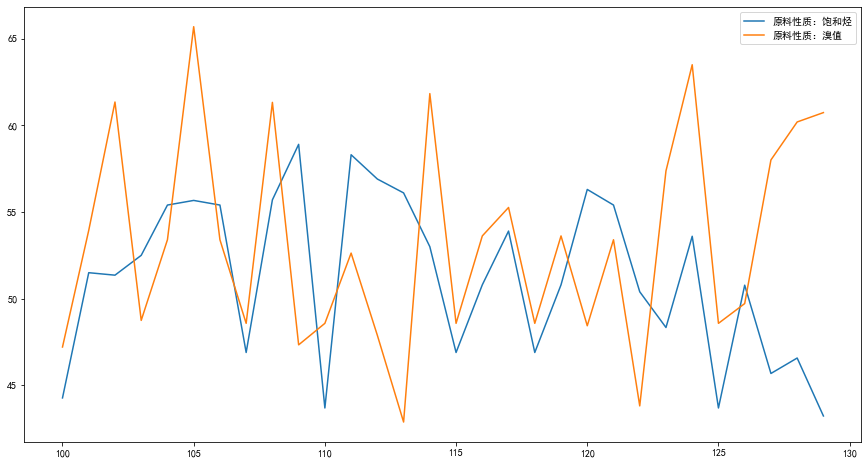

In [141]:
plt.figure(figsize=(15, 8))
plt.plot(data.iloc[100:130][data.columns[3]], label=data.columns[3])
plt.plot(data.iloc[100:130][data.columns[5]], label=data.columns[5])
plt.legend()
plt.show()

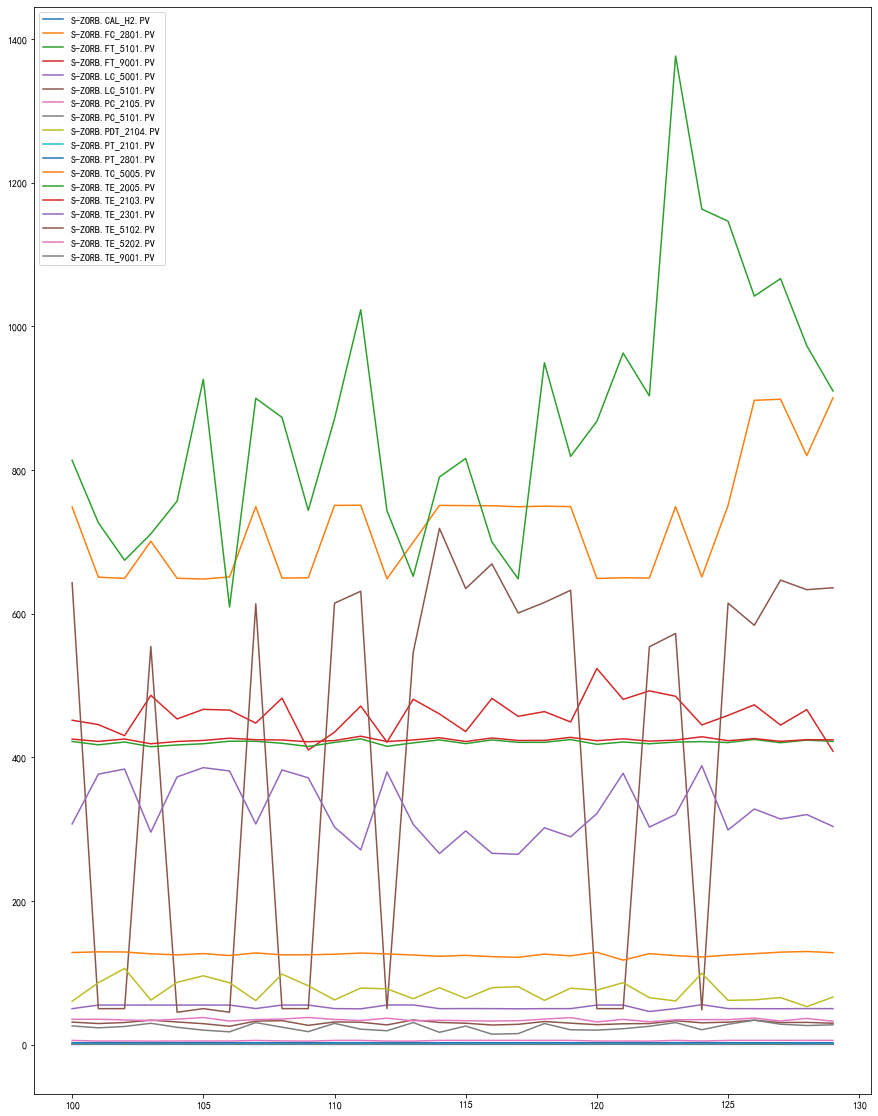

In [138]:
plt.figure(figsize=(15, 20))
for i in range(11,len(data.columns)):
    plt.plot(data.iloc[100:130][data.columns[i]], label=data.columns[i])
plt.legend()
plt.show()

In [129]:
plt.figure(figsize=(15, 8))
for c in range(11, len(data.columns)):
    plt.plot(data[data.columns[i]])
plt.show()

IndexError: index 80 is out of bounds for axis 0 with size 29

<Figure size 1080x576 with 0 Axes>

In [87]:
data_133 = data_325[ data_325['样本编号']==133 ]

In [89]:
feature_range = pd.read_excel("主要变量的操作范围.xlsx", na_values=np.nan)

In [92]:
names = list(feature_range["name"].T)

In [93]:
names

['S-ZORB.CAL_H2.PV',
 'S-ZORB.FC_2801.PV',
 'S-ZORB.FT_5101.PV',
 'S-ZORB.FT_9001.PV',
 'S-ZORB.LC_5001.PV',
 'S-ZORB.LC_5101.PV',
 'S-ZORB.PC_2105.PV',
 'S-ZORB.PC_5101.PV',
 'S-ZORB.PDT_2104.PV',
 'S-ZORB.PT_2101.PV',
 'S-ZORB.PT_2801.PV',
 'S-ZORB.TC_5005.PV',
 'S-ZORB.TE_2005.PV',
 'S-ZORB.TE_2103.PV',
 'S-ZORB.TE_2301.PV',
 'S-ZORB.TE_5102.PV',
 'S-ZORB.TE_5202.PV',
 'S-ZORB.TE_9001.PV']

In [95]:
data_133.columns[:30]

Index(['样本编号', '时间', 'RON损失', '原料性质：硫含量', '原料性质：辛烷值', '原料性质：饱和烃', '原料性质：烯烃',
       '原料性质：芳烃', '原料性质：溴值', '原料性质：密度', '产品性质：硫含量', '产品性质：辛烷值', '待生吸附剂性质：焦炭',
       '待生吸附剂性质：S', '再生吸附剂性质：焦炭', '再生吸附剂性质：S', 'S-ZORB.CAL_H2.PV',
       'S-ZORB.PDI_2102.PV', 'S-ZORB.PT_2801.PV', 'S-ZORB.FC_2801.PV',
       'S-ZORB.TE_2103.PV', 'S-ZORB.TE_2005.PV', 'S-ZORB.PT_2101.PV',
       'S-ZORB.PDT_2104.PV', 'S-ZORB.TE_2301.PV', 'S-ZORB.PT_2301.PV',
       'S-ZORB.PC_2105.PV', 'S-ZORB.PC_5101.PV', 'S-ZORB.TC_5005.PV',
       'S-ZORB.LC_5001.PV'],
      dtype='object')

In [96]:
feature_names = ['RON损失', '原料性质：硫含量', '原料性质：辛烷值', '原料性质：饱和烃', '原料性质：烯烃',
       '原料性质：溴值', '原料性质：密度',  '待生吸附剂性质：焦炭',
       '待生吸附剂性质：S', '再生吸附剂性质：焦炭', '再生吸附剂性质：S','S-ZORB.CAL_H2.PV',
 'S-ZORB.FC_2801.PV',
 'S-ZORB.FT_5101.PV',
 'S-ZORB.FT_9001.PV',
 'S-ZORB.LC_5001.PV',
 'S-ZORB.LC_5101.PV',
 'S-ZORB.PC_2105.PV',
 'S-ZORB.PC_5101.PV',
 'S-ZORB.PDT_2104.PV',
 'S-ZORB.PT_2101.PV',
 'S-ZORB.PT_2801.PV',
 'S-ZORB.TC_5005.PV',
 'S-ZORB.TE_2005.PV',
 'S-ZORB.TE_2103.PV',
 'S-ZORB.TE_2301.PV',
 'S-ZORB.TE_5102.PV',
 'S-ZORB.TE_5202.PV',
 'S-ZORB.TE_9001.PV']

In [97]:
len(feature_names)

29

In [98]:
data_133 = data_133[feature_names]

In [100]:
data_133.head()

,RON损失,原料性质：硫含量,原料性质：辛烷值,原料性质：饱和烃,原料性质：烯烃,原料性质：溴值,原料性质：密度,待生吸附剂性质：焦炭,待生吸附剂性质：S,再生吸附剂性质：焦炭,...,S-ZORB.PDT_2104.PV,S-ZORB.PT_2101.PV,S-ZORB.PT_2801.PV,S-ZORB.TC_5005.PV,S-ZORB.TE_2005.PV,S-ZORB.TE_2103.PV,S-ZORB.TE_2301.PV,S-ZORB.TE_5102.PV,S-ZORB.TE_5202.PV,S-ZORB.TE_9001.PV
102,1.31,248.0,89.4,55.9,20.6,50.11,727.8,2.53,8.57,1.3,...,82.388954,2.361462,2.476889,124.658965,420.101342,426.61955,380.73177,25.778817,34.452484,13.618144


In [101]:
X = data_133[feature_names[1:]]

In [102]:
y = data_133['RON损失']

In [107]:
feature_range = pd.read_excel("主要变量的操作范围.xlsx",index_col=0 , na_values=np.nan)

In [110]:
feature_range

,min,max,step
name,,,
S-ZORB.CAL_H2.PV,0.20,0.37,0.01
S-ZORB.FC_2801.PV,600.00,1000.00,50.00
S-ZORB.FT_5101.PV,430.00,1500.00,50.00
S-ZORB.FT_9001.PV,350.00,600.00,50.00
S-ZORB.LC_5001.PV,45.00,60.00,1.00
S-ZORB.LC_5101.PV,40.00,800.00,50.00
S-ZORB.PC_2105.PV,4.50,5.85,0.10
S-ZORB.PC_5101.PV,0.60,0.70,0.05
S-ZORB.PDT_2104.PV,50.00,110.00,5.00


In [ ]:
model_RFR = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=666)
model_RFR.fit(X, y)




y_predict = model_RFR.predict(x_text)
mse_score = MSE(y, y_predict)
rmse_score = np.sqrt(mse_score)
mae_score = mean_absolute_error(y_test_ron_loss, y_ron_loss_predict_1)
rr_score = r2_score(y_test_ron_loss, y_ron_loss_predict_1)
print("随机森林回归模型")
print("MSE_SCORE = ", mse_score)
print("RMSE_SCORE = ", rmse_score)
print("R_Square = ", rr_score)

In [64]:
# X = data[ feature_names_list[:28] ]
# y_ron_loss = data[ feature_names_list[29] ]

In [65]:
# x_train_ron_loss, x_test_ron_loss, y_train_ron_loss, y_test_ron_loss = train_test_split(X, y_ron_loss, test_size=0.3, random_state=1)

In [66]:
#x_train_ron_loss.columns[:29]

In [67]:
#x_train, x_test, y_train, y_test = x_train_ron_loss.iloc[:-2],x_test_ron_loss.iloc[:-2],y_train_ron_loss.iloc[-1],y_test_ron_loss.iloc[-1]

In [68]:
#x_train

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

In [70]:
model_RFR = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=666)
model_RFR.fit(x_train_ron_loss, y_train_ron_loss)
y_ron_loss_predict_1 = model_RFR.predict(x_test_ron_loss)
model_fearture = model_RFR.feature_importances_
mse_score = MSE(y_test_ron_loss, y_ron_loss_predict_1)
rmse_score = np.sqrt(mse_score)
mae_score = mean_absolute_error(y_test_ron_loss, y_ron_loss_predict_1)
rr_score = r2_score(y_test_ron_loss, y_ron_loss_predict_1)
print("随机森林回归模型")
print("MSE_SCORE = ", mse_score)
print("RMSE_SCORE = ", rmse_score)
print("R_Square = ", rr_score)

# model_RFR = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=666)
# model_RFR.fit(x_train, y_train)
# y_predict = model_RFR.predict(x_test)
# model_fearture = model_RFR.feature_importances_
# mse_score = MSE(y_test, y_predict)
# rmse_score = np.sqrt(mse_score)
# mae_score = mean_absolute_error(y_test, y_predict)
# rr_score = r2_score(y_test, y_predict)
# print("随机森林回归模型")
# print("MSE_SCORE = ", mse_score)
# print("RMSE_SCORE = ", rmse_score)
# print("R_Square = ", rr_score)

随机森林回归模型
MSE_SCORE =  0.03950825733051347
RMSE_SCORE =  0.1987668416273536
R_Square =  0.07098332106835259


In [144]:
res = x_test_ron_loss

In [145]:
res = res.reset_index(drop=True)

In [148]:
res.to_excel("res.xlsx", index=False)

In [71]:
# y_ron_loss_predict_1

array([1.31635162, 1.22099086, 1.34769623, 1.16193617, 1.28266473,
       1.41687763, 1.44724321, 1.30363243, 1.25912475, 1.16021289,
       1.26789484, 1.06729279, 1.19117836, 1.27779582, 1.13770678,
       1.20026467, 1.30041962, 1.29483589, 1.21256905, 1.24085787,
       1.32255873, 1.38747749, 1.16968421, 1.4545376 , 1.19340734,
       1.17804959, 1.19972475, 1.21145862, 1.36908996, 1.25328887,
       1.25017148, 1.29019223, 1.19437836, 1.3664641 , 1.33043592,
       1.27997628, 1.3404612 , 1.37517264, 1.3719264 , 1.26768898,
       1.30144652, 1.29469462, 1.32523104, 1.3219021 , 1.17483386,
       1.28358891, 1.2215375 , 1.17856932, 1.22868352, 1.19192682,
       1.43002311, 1.17556407, 1.46711323, 1.34186061, 1.36918835,
       1.23417965, 1.27922015, 1.20600361, 1.22273385, 1.31916455,
       1.29498246, 1.2276392 , 1.31846878, 1.2023313 , 1.28334481,
       1.34291945, 1.40991347, 1.26962263, 1.30751329, 1.22190678,
       1.20043576, 1.29133705, 1.21164295, 1.25329847, 1.24387

In [73]:
# y = np.array(y_test_ron_loss)
# y

array([1.7 , 1.4 , 1.1 , 1.34, 1.2 , 1.2 , 1.3 , 1.21, 1.4 , 1.34, 1.1 ,
       1.04, 1.22, 1.38, 1.21, 1.34, 1.81, 1.18, 1.28, 1.05, 1.28, 1.51,
       1.3 , 1.38, 1.15, 1.2 , 1.25, 1.22, 1.5 , 1.7 , 1.25, 1.44, 1.2 ,
       1.3 , 1.41, 1.28, 1.8 , 1.75, 1.42, 1.1 , 1.68, 1.22, 1.6 , 1.08,
       1.12, 1.28, 1.44, 1.3 , 1.05, 1.41, 0.81, 1.11, 1.51, 1.31, 1.61,
       1.3 , 1.18, 1.2 , 1.14, 1.41, 1.4 , 1.22, 1.24, 1.22, 1.4 , 1.54,
       1.68, 0.91, 1.38, 1.31, 1.25, 1.78, 1.21, 1.11, 1.51, 1.51, 1.02,
       1.28, 1.58, 1.01, 1.2 ])

In [74]:
# for i in range(len(y)):
#     loss = (y[i] - y_ron_loss_predict_1[i])/y[i]
#     print(loss)

0.22567551543375336
0.1278636696640641
-0.22517838794719902
0.13288345797694076
-0.06888727817328819
-0.18073135723480507
-0.1132640058549135
-0.0773821724107079
0.10062517544869394
0.13416948399925024
-0.15263167206083694
-0.026243070752491472
0.023624296552723974
0.07406100352107033
0.05974646322960121
0.1042800935164922
0.2815361217533533
-0.09731855430526638
0.05268043287240938
-0.18176939746716658
-0.03324900853352383
0.0811407343885901
0.10024291654373443
-0.054012756460916064
-0.037745515294120464
0.01829200927743223
0.04022020013957679
0.007001130561439365
0.08727336091708156
0.26277125455542394
-0.00013718779367497547
0.1040331747193803
0.004684698862748385
-0.051126231506907066
0.056428423222912166
1.8529624083545013e-05
0.2552993351419516
0.21418706508142954
0.03385465102510388
-0.15244452394504132
0.22532944942041508
-0.06122510081176272
0.17173059810073313
-0.22398342773197805
-0.048958807178984085
-0.002803838374587813
0.15171007122598332
0.09340821701506304
-0.1701747788